In [51]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# libraries used for graph and visulization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# libraries used for missing value 
import missingno as msno 

#libraries used for preprocessing and modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, precision_score, roc_curve, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV





In [52]:
df = pd.read_csv('Lending_Club_Data.csv')

In [53]:
df.describe()

,Id,is_bad,annual_inc,debt_to_income,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog
count,10000.00000,10000.000000,9999.000000,10000.000000,9995.000000,9995.000000,3684.000000,840.000000,9995.000000,9995.000000,1.000000e+04,9974.000000,9995.000000,9968.0,10000.000000
mean,5000.50000,0.129500,68203.011539,13.338704,0.148174,1.066933,35.890337,61.652381,9.334567,0.060130,1.427101e+04,48.450771,22.011306,0.0,2.002200
std,2886.89568,0.335769,48590.252757,6.754212,0.506270,1.476052,22.361443,46.189619,4.526590,0.251245,2.543791e+04,28.220557,11.709400,0.0,0.810963
min,1.00000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.0,1.000000
25%,2500.75000,0.000000,40000.000000,8.160000,0.000000,0.000000,18.000000,0.000000,6.000000,0.000000,3.524500e+03,25.000000,13.000000,0.0,1.000000
50%,5000.50000,0.000000,58000.000000,13.410000,0.000000,1.000000,34.000000,86.000000,9.000000,0.000000,8.645500e+03,48.700000,20.000000,0.0,2.000000
75%,7500.25000,0.000000,82000.000000,18.692500,0.000000,2.000000,53.000000,101.000000,12.000000,0.000000,1.695225e+04,71.800000,29.000000,0.0,3.000000
max,10000.00000,1.000000,900000.000000,29.990000,11.000000,25.000000,120.000000,119.000000,39.000000,3.000000,1.207359e+06,100.600000,90.000000,0.0,3.000000


In [54]:
loan_df =df.copy()

In [55]:
loan_df.isna().sum()

Id                                0
is_bad                            0
emp_title                       592
emp_length                        0
home_ownership                    0
annual_inc                        1
verification_status               0
pymnt_plan                        0
Notes                          3231
purpose_cat                       0
purpose                           4
zip_code                          0
addr_state                        0
debt_to_income                    0
delinq_2yrs                       5
earliest_cr_line                  5
inq_last_6mths                    5
mths_since_last_delinq         6316
mths_since_last_record         9160
open_acc                          5
pub_rec                           5
revol_bal                         0
revol_util                       26
total_acc                         5
initial_list_status               0
collections_12_mths_ex_med       32
mths_since_last_major_derog       0
policy_code                 

<Axes: >

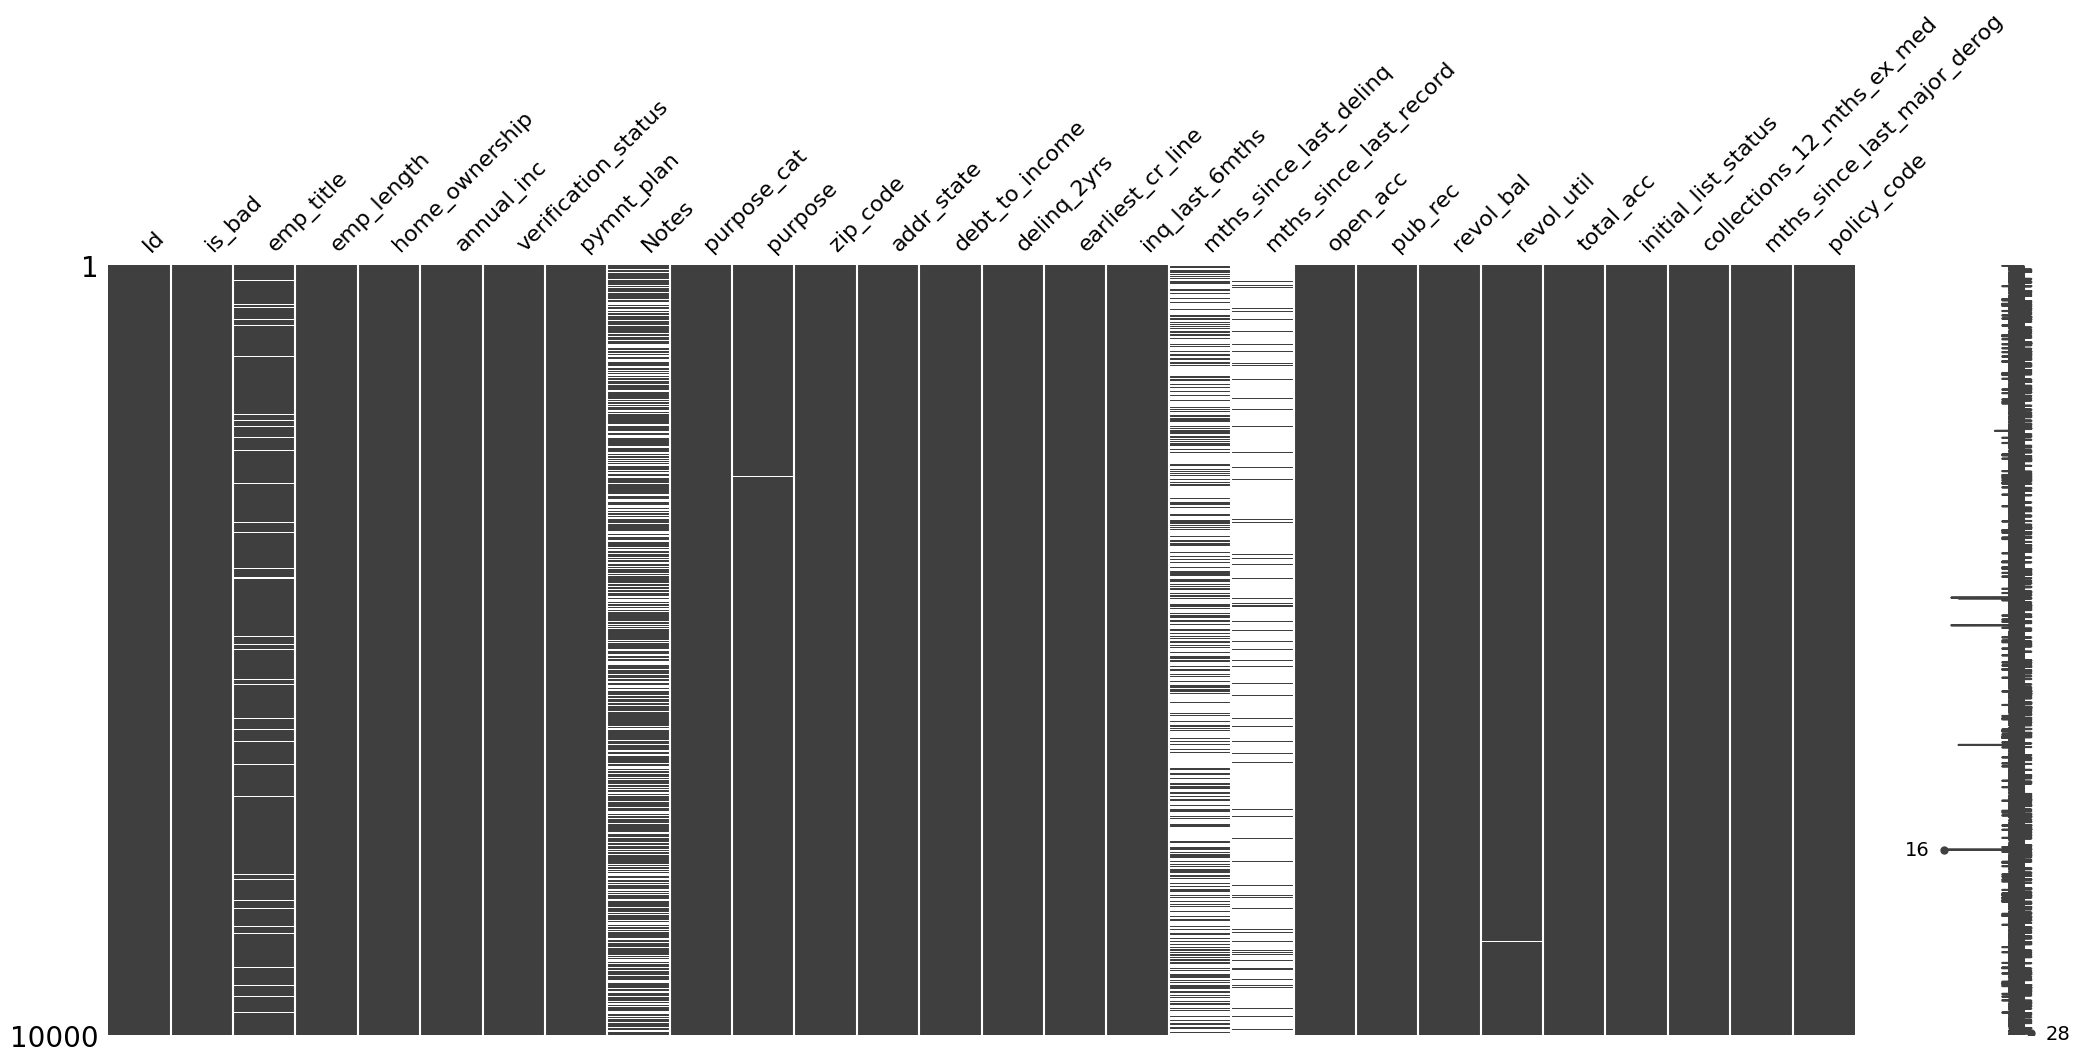

In [56]:
msno.matrix(loan_df)

<Axes: >

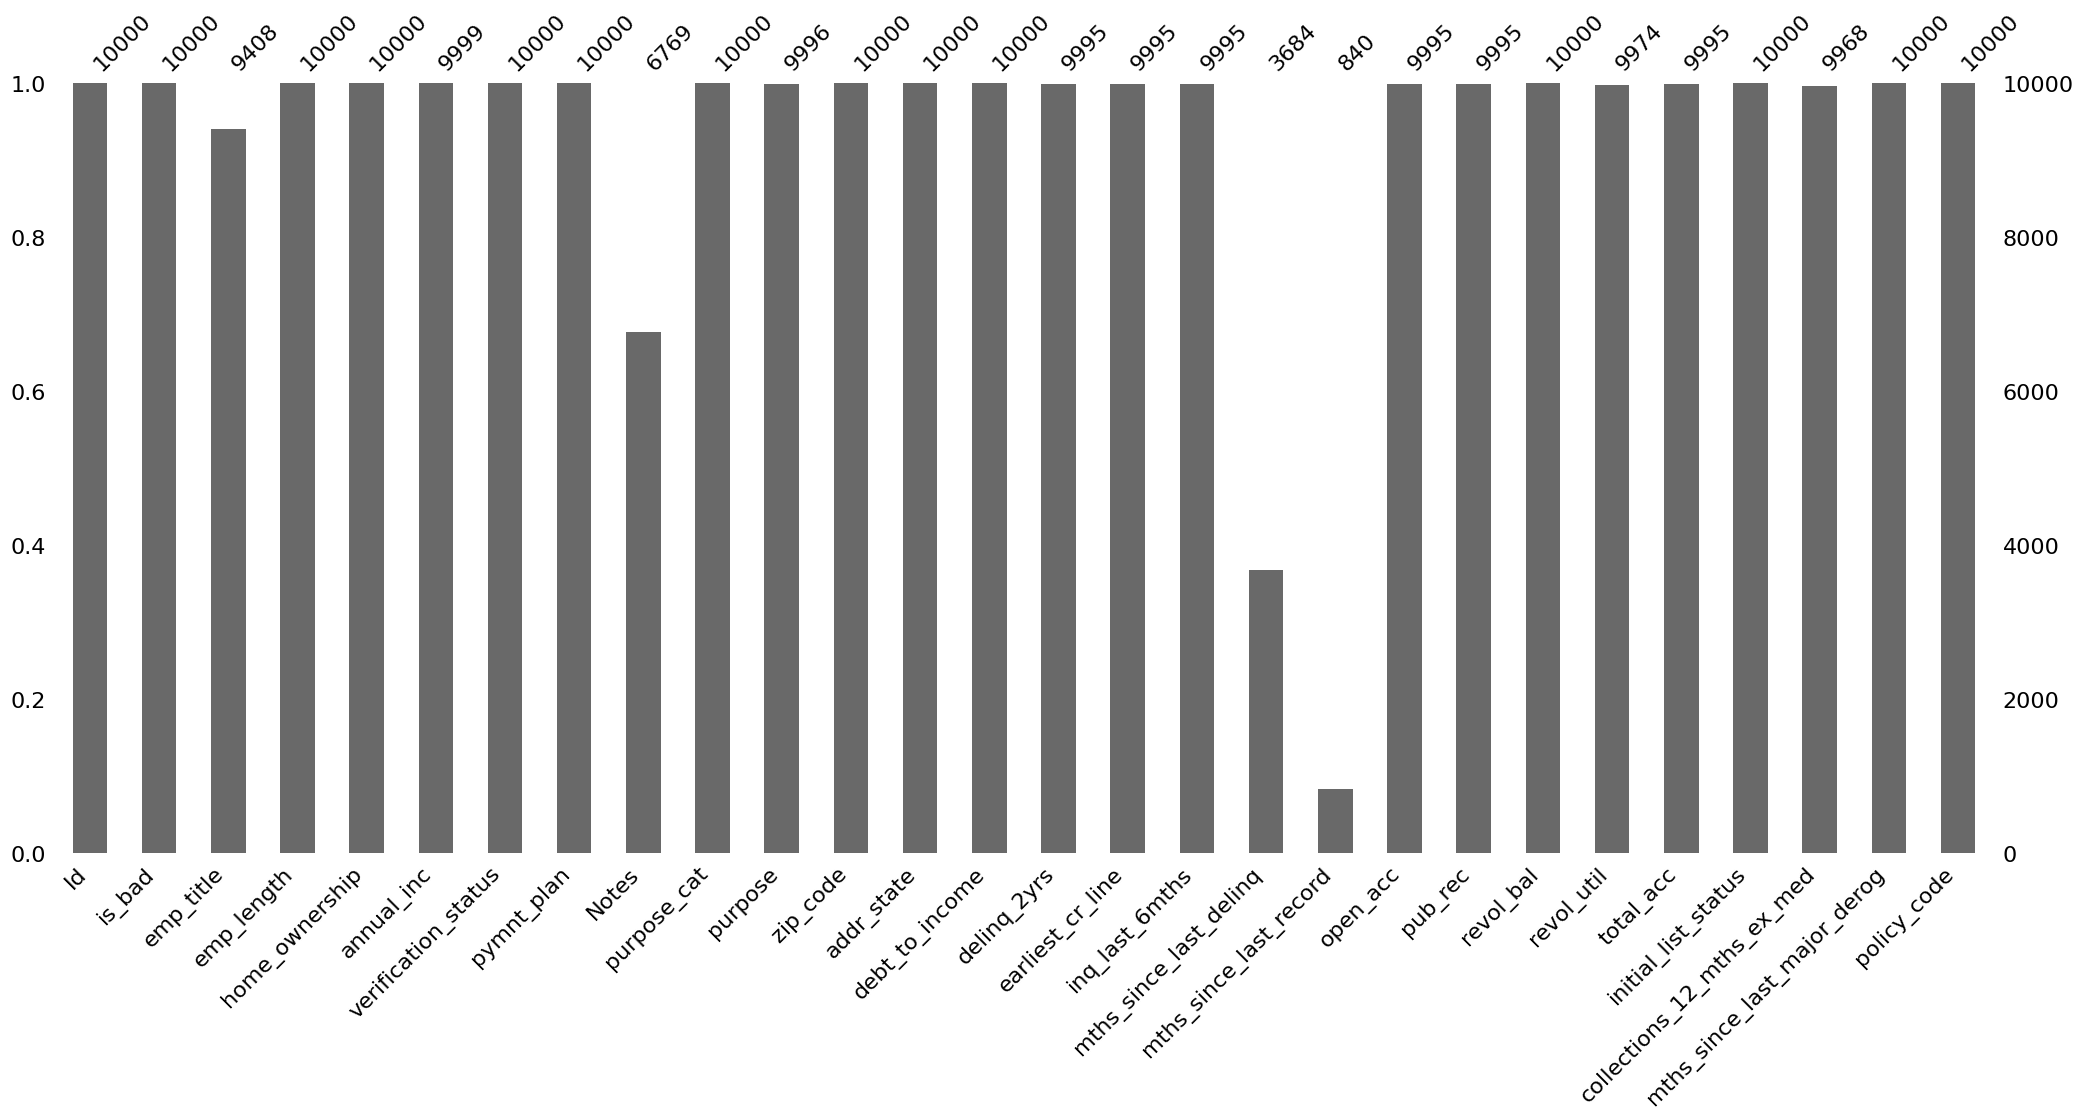

In [57]:
msno.bar(loan_df)

In [58]:
loan_df.head()

,Id,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,1,0,Time Warner Cable,10,MORTGAGE,50000.0,not verified,n,NaN,medical,...,NaN,15.0,0.0,12087,12.1,44.0,f,0.0,1,PC4
1,2,0,Ottawa University,1,RENT,39216.0,not verified,n,Borrower added on 04/14/11 > I will be using...,debt consolidation,...,NaN,4.0,0.0,10114,64.0,5.0,f,0.0,2,PC1
2,3,0,Kennedy Wilson,4,RENT,65000.0,not verified,n,NaN,credit card,...,NaN,4.0,0.0,81,0.6,8.0,f,0.0,3,PC4
3,4,0,TOWN OF PLATTEKILL,10,MORTGAGE,57500.0,not verified,n,NaN,debt consolidation,...,NaN,6.0,0.0,10030,37.1,23.0,f,0.0,2,PC2
4,5,0,Belmont Correctional,10,MORTGAGE,50004.0,VERIFIED - income,n,"I want to consolidate my debt, pay for a vacat...",debt consolidation,...,NaN,8.0,0.0,10740,40.4,21.0,f,0.0,3,PC3


In [59]:
loan_df.emp_title.value_counts()

emp_title
US Army                37
Bank of America        23
IBM                    22
USAF                   17
US Navy                17
                       ..
Messier Bugatti USA     1
US Customs              1
City of Riverside       1
Amedisys                1
Rehab Alliance          1
Name: count, Length: 8183, dtype: int64

In [60]:
loan_df.emp_title.value_counts().tail()

emp_title
Messier Bugatti USA    1
US Customs             1
City of Riverside      1
Amedisys               1
Rehab Alliance         1
Name: count, dtype: int64

In [61]:
loan_df.emp_title.unique().shape

(8184,)

In [62]:
import pandas as pd

# Create a DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

# Drop column 'B'
df.drop(columns=['B'], inplace=True)
df


,A
0,1
1,2
2,3


In [63]:
# Create a DataFrame with missing values
data = {'A': [1, 2, None], 'B': [4, None, 6]}
df = pd.DataFrame(data)

# Drop rows with any NaN values
df.dropna(inplace=True)
df

,A,B
0,1.0,4.0


In [64]:
import pandas as pd
import numpy as np

# Create a DataFrame with missing values
data = {'A': [1, 2, None], 'B': [4, None, 6], 'C': [None, 8, 9]}
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Drop columns with any NaN values
df.dropna(axis=1, inplace=True)

# Display the modified DataFrame
print("\nDataFrame after dropping columns with NaN values:")
print(df)


Original DataFrame:
     A    B    C
0  1.0  4.0  NaN
1  2.0  NaN  8.0
2  NaN  6.0  9.0

DataFrame after dropping columns with NaN values:
Empty DataFrame
Columns: []
Index: [0, 1, 2]


In [65]:
import numpy as np
df = pd.DataFrame(np.arange(25).reshape(5, 5),  
                      index=list('abcde'), 
                      columns=['x','y','z', 'a', 'b'])
df

,x,y,z,a,b
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19
e,20,21,22,23,24


In [66]:
df.loc['c': 'd' , :'z']

,x,y,z
c,10,11,12
d,15,16,17


In [67]:
df.iloc[:, 3] 

a     3
b     8
c    13
d    18
e    23
Name: a, dtype: int32

In [68]:
#data won’t be meaningful and any relationship we might observe might be due to confounding relationships
#A more advanced implementation might look to group all these job descriptions into categories and/or examine
#if Lending Club’s model looks at (annual_inc + emp_title) versus just annual_inc
# loan_df.drop(['emp_title'],1, inplace=True)

In [69]:
# droping columns having misleading values, missing values > 50%, indentity values, encrypted values
loan_df.drop(['mths_since_last_delinq','mths_since_last_record','collections_12_mths_ex_med','Notes','purpose','earliest_cr_line','Id','collections_12_mths_ex_med','initial_list_status','zip_code'], axis=1,inplace=True)

In [70]:
loan_df.emp_length.value_counts()

emp_length
10    2160
1     2083
2     1183
3     1010
4      889
5      779
6      535
7      421
8      351
9      331
na     250
22       5
11       2
33       1
Name: count, dtype: int64

In [71]:
#filling na values with avreage values
loan_df['emp_length'] = pd.to_numeric(loan_df['emp_length'], errors='coerce')
avg_value=loan_df['emp_length'].median()
loan_df['emp_length'] =loan_df['emp_length'].fillna(avg_value)
loan_df

,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose_cat,addr_state,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,policy_code
0,0,Time Warner Cable,10.0,MORTGAGE,50000.0,not verified,n,medical,TX,10.87,0.0,0.0,15.0,0.0,12087,12.1,44.0,1,PC4
1,0,Ottawa University,1.0,RENT,39216.0,not verified,n,debt consolidation,KS,9.15,0.0,2.0,4.0,0.0,10114,64.0,5.0,2,PC1
2,0,Kennedy Wilson,4.0,RENT,65000.0,not verified,n,credit card,CA,11.24,0.0,0.0,4.0,0.0,81,0.6,8.0,3,PC4
3,0,TOWN OF PLATTEKILL,10.0,MORTGAGE,57500.0,not verified,n,debt consolidation,NY,6.18,1.0,0.0,6.0,0.0,10030,37.1,23.0,2,PC2
4,0,Belmont Correctional,10.0,MORTGAGE,50004.0,VERIFIED - income,n,debt consolidation,OH,19.03,0.0,4.0,8.0,0.0,10740,40.4,21.0,3,PC3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,Cabot,5.0,MORTGAGE,66250.0,VERIFIED - income,n,wedding,MA,9.40,0.0,1.0,8.0,0.0,3656,24.1,10.0,2,PC3
9996,0,Gallant & Wein,1.0,RENT,26000.0,VERIFIED - income source,n,debt consolidation,NY,20.49,0.0,1.0,8.0,0.0,6709,58.9,12.0,2,PC3
9997,0,"Weichert, Realtors",8.0,RENT,47831.0,not verified,n,debt consolidation,NJ,24.13,0.0,0.0,9.0,1.0,11346,60.7,17.0,3,PC3
9998,0,meadwestvaco,6.0,MORTGAGE,70000.0,not verified,n,major purchase,VA,16.18,2.0,2.0,9.0,0.0,17157,50.9,27.0,2,PC3


In [72]:
loan_df.isnull().sum()

is_bad                           0
emp_title                      592
emp_length                       0
home_ownership                   0
annual_inc                       1
verification_status              0
pymnt_plan                       0
purpose_cat                      0
addr_state                       0
debt_to_income                   0
delinq_2yrs                      5
inq_last_6mths                   5
open_acc                         5
pub_rec                          5
revol_bal                        0
revol_util                      26
total_acc                        5
mths_since_last_major_derog      0
policy_code                      0
dtype: int64

In [73]:
#VERIFIED - income and VERIFIED - income source could potentially be the same criteria
loan_df.verification_status.value_counts()

verification_status
not verified                4367
VERIFIED - income           3214
VERIFIED - income source    2419
Name: count, dtype: int64

In [74]:
for i in loan_df._get_numeric_data().columns:
    loan_df[i] = loan_df[i].fillna(loan_df[i].median())

In [75]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [76]:
tri_upper_diag = np.triu(a, k=0)
tri_upper_diag

array([[1, 2, 3],
       [0, 5, 6],
       [0, 0, 9]])

In [77]:
tri_lower_diag = np.tril(a, k=0)
tri_lower_diag

array([[1, 0, 0],
       [4, 5, 0],
       [7, 8, 9]])

# EDA - on Leanding club data


In [78]:
cor = loan_df.corr()
cor

ValueError: could not convert string to float: 'Time Warner Cable'

In [79]:
#highly corelated attributes
cor = loan_df.corr()
#cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

ValueError: could not convert string to float: 'Time Warner Cable'

In [ ]:
loan_df.drop(['total_acc'], axis=1, inplace=True)

In [ ]:
loan_df.pymnt_plan.unique().shape

In [ ]:
loan_df.pymnt_plan.value_counts()

In [ ]:
# droping pymnt_plan, it is identity attribute
loan_df.drop(['pymnt_plan'],1, inplace=True)

In [ ]:
loan_df.describe(include=['object'])

In [ ]:
len(loan_df.columns)

In [ ]:
#correlation Matrix
loan_cor = loan_df.corr()

In [ ]:
#heat map for correlation
mask = np.zeros_like(loan_cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(loan_cor, mask=mask,
            vmax=.3,
            cmap=cmap,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

In [ ]:
#analysing loan purpose
purpose = loan_df.purpose_cat.value_counts()
purpose.plot.barh(figsize =(10,5),color ="blue")

In [ ]:
dist =sns.countplot(data=loan_df,hue='is_bad',x='purpose_cat')
dist.set_xticklabels(dist.get_xticklabels(), rotation=40, ha="right")
plt.title('Loan distribution')
plt.xlabel('purpose',)
plt.ylabel('status')

In [ ]:
dist =sns.countplot(data=loan_df,hue='is_bad',x='verification_status')
dist.set_xticklabels(dist.get_xticklabels(), rotation=40, ha="right")
plt.title('Loan distribution')
plt.xlabel('purpose',)
plt.ylabel('status')

In [ ]:
#analysing bad and not bad loan
is_bad_loan = loan_df[loan_df.is_bad == 1]
not_bad_loan = loan_df[loan_df.is_bad == 0]

In [ ]:
print(not_bad_data.shape)
print(is_bad_data.shape)
print(loan_df['is_bad'].shape)

In [ ]:
is_bad_loan.head()

In [ ]:
plt.scatter(x= is_bad_loan['annual_inc'], y= is_bad_data['debt_to_income'])

In [ ]:
plt.scatter(x= not_bad_data['annual_inc'], y= not_bad_data['debt_to_income'])

In [ ]:
sns.FacetGrid(loan_df, hue="is_bad",size=5) \
   .map(plt.scatter, "annual_inc", "debt_to_income") \
   .add_legend(title = 'Staus', labels = ['Approved','Rejected'])

In [ ]:
loan_df.head()

In [ ]:
loan_df.home_ownership.value_counts()

In [ ]:
loan_df.addr_state.value_counts()

In [ ]:
loan_df.policy_code.value_counts()

In [ ]:
# Droping policy_code, not relevent for investigation
loan_df.drop(['policy_code'],1, inplace=True)

In [ ]:
# Droping addr_state, not relevent for investigation
loan_df.drop(['addr_state'],1, inplace=True)

In [ ]:
#dealing with categorical attributes

# Create dummy variables from the feature purpose_cat
loan_df = pd.get_dummies(loan_df, columns=["purpose_cat"], drop_first=True)

# Create dummy variables from the feature home_ownership 
loan_df = pd.get_dummies(loan_df, columns=["home_ownership"], drop_first=True)

# Create dummy variables from the feature verification_status
loan_df = pd.get_dummies(loan_df, columns=["verification_status"], drop_first=True)

In [ ]:
loan_df.head()

In [ ]:
my_list = list(loan_df)
Independent = my_list[1:]

In [ ]:
X = loan_df[Independent]

In [ ]:
depended = ['is_bad']

In [ ]:
Y = loan_df[depended]
Y.shape

In [ ]:
X.shape

In [ ]:
loan_df.head()

# Modeling and Feature Selection

## Randon Forest

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Feature Scaling
sc = StandardScaler()

X_train[num]= sc.fit_transform(X_train[num])
X_test[num] = sc.transform(X_test[num])

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
rf_classifier = RandomForestClassifier(criterion = 'entropy',
                                                   max_depth= 4,
                                                   max_features ='log2',
                                                   n_estimators = 100,
                                                   min_samples_split = 6,
                                                   class_weight = {0: 1, 1: 5}
                                                  )

In [ ]:
rf_classifier.fit(X_train, y_train)

In [ ]:
y_pred_train_rf= rf_classifier.predict(X_train)

In [ ]:
print('Precision', precision_score(y_train, y_pred_train_rf))
print('Accuracy', accuracy_score(y_train, y_pred_train_rf))
print('F1 Score', f1_score(y_train, y_pred_train_rf))
print('Recall', recall_score(y_train, y_pred_train_rf))

In [ ]:
y_pred_test_rf = rf_classifier.predict(X_test)

In [ ]:
print('Precision', precision_score(y_test, y_pred_test_rf))
print('Accuracy', accuracy_score(y_test, y_pred_test_rf))
print('F1 Score', f1_score(y_test, y_pred_test_rf))
print('Recall', recall_score(y_test, y_pred_test_rf))

In [ ]:
cm_rf = confusion_matrix(y_test,y_pred_test)
print(cm_rf)

## SVM

In [ ]:
svm_classifier = SVC(probability = True)
svm_classifier.fit(X_train,y_train)

In [ ]:
y_pred_train_svm= svm_classifier.predict(X_train)

In [ ]:
print('Precision', precision_score(y_train, y_pred_train_svm))
print('Accuracy', accuracy_score(y_train, y_pred_train_svm))
print('F1 Score', f1_score(y_train, y_pred_train_svm))
print('Recall', recall_score(y_train, y_pred_train_svm))

In [ ]:
y_pred_test_svm = svm_classifier.predict(X_test)

In [ ]:
print('Precision', precision_score(y_test, y_pred_test_svm))
print('Accuracy', accuracy_score(y_test, y_pred_test_svm))
print('F1 Score', f1_score(y_test, y_pred_test_svm))
print('Recall', recall_score(y_test, y_pred_test_svm))

In [ ]:
cm_svm = confusion_matrix(y_test,y_pred_test_svm)
print(cm_svm)

In [ ]:
import pandas as pd
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',     
                                                                        ascending=False)

In [ ]:
sns.barplot(x=feature_importances[:10].importance, y=feature_importances[:10].index)

In [ ]:
y_scores_sm= svm_classifier.predict_proba(X_test.values)
y_scores_rf = rf_classifier.predict_proba(X_test.values)

In [ ]:
fpr_rf, tpr_rf, thresholds_rf= roc_curve(y_test, y_scores_rf[:,1])
fpr_svm, tpr_svm, thresholds_svm= roc_curve(y_test, y_scores_sm[:,1])

In [ ]:
plt.figure(figsize=(10, 10))

plt.plot(fpr_rf, tpr_rf, label= 'Random Forest')
plt.plot(fpr_svm, tpr_svm, label= 'SVM')

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

In [ ]:
y_scores_sm_train = svm_classifier.predict_proba(X_train.values)
y_scores_rf_train = rf_classifier.predict_proba(X_train.values)

In [ ]:
fpr_rf_train, tpr_rf_train, thresholds_rf_train= roc_curve(y_train, y_scores_rf_train[:,1])
fpr_svm_train, tpr_svm_train, thresholds_svm_train= roc_curve(y_train, y_scores_sm_train[:,1])

In [ ]:
plt.figure(figsize=(10, 10))

plt.plot(fpr_rf_train, tpr_rf_train, label= 'Random Forest')
plt.plot(fpr_svm_train, tpr_svm_train, label= 'SVM')

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Saving a Model

In [ ]:
import pickle
dict_objects = {'Standard Scaling':sc, 
                'Random Forest Classifier': rf_classifier,
                'SVM Classifier': svm_classifier
                }

In [ ]:
filename = 'ModelPickles.pkl'
outfile = open(filename,'wb')

In [ ]:
pickle.dump(dict_objects,outfile)
outfile.close()

In [ ]:
import googleapiclient.discovery

def predict_json(project, model, instances, version=None):
    """Send json data to a deployed model for prediction.
    Args:
        project (str): project where the AI Platform Prediction Model is deployed.
        model (str): model name.
        instances ([[float]]): List of input instances, where each input
           instance is a list of floats.
        version: str, version of the model to target.
    Returns:
        Mapping[str: any]: dictionary of prediction results defined by the
            model.
    """
    # Create the AI Platform Prediction service object.
    # To authenticate set the environment variable
    # GOOGLE_APPLICATION_CREDENTIALS=<path_to_service_account_file>
    service = googleapiclient.discovery.build('ml', 'v1')
    name = 'projects/{}/models/{}'.format(project, model)

    if version is not None:
        name += '/versions/{}'.format(version)

    response = service.projects().predict(
        name=name,
        body={'instances': instances}
    ).execute()
   
    if 'error' in response:
        raise RuntimeError(response['error'])

    return response['predictions']

In [ ]:
import json
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'xxxxxxxxxxxxx.json'

test = X_test.iloc[20:21].values
test.shape
test.reshape(1, -1)
instances = test.tolist()
predict_json('mwpmltr', 'lending_club_model', instances)